###### In this week, we will use NHL data from MOOC 1, saved to NHL_game2 as csv file to demonstrate how to fit Liniear Probability Model (LPM) and Logistic Regression Model (LRM). 

## 1. Data Preparation

### 1.1) Import libraries & Dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Import data
NHL_game = pd.read_csv("../../Data/Week 1/NHL_game2.csv")

## Self Test - Exploratory Data Analysis 
- Instruction: Explore the imported data by using some python commands. Specifically you should be able to: 
    - Display the raw data 
    - Examine dimensionality of the raw data
    - Obtain the list of variables
    - Explore the data types in the dataset
    - Obtain various summary statistics (e.g., mean, variance, etc.)
    - Explore the missing values within the data frame

In [3]:
# Explore the Dataset here

In [3]:
# Display data
display(NHL_game[0:10])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year
0,2,2017 NHL Regular Season,2018-03-20,2254,3.0,4.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
1,2,2017 NHL Regular Season,2018-03-07,2050,4.0,5.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
2,2,2017 NHL Regular Season,2017-12-06,844,2.0,6.0,4.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
3,2,2017 NHL Regular Season,2017-11-23,659,2.0,3.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
4,2,2017 NHL Regular Season,2018-03-13,2147,7.0,4.0,-3.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017
5,2,2017 NHL Regular Season,2017-11-04,407,4.0,5.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
6,2,2017 NHL Regular Season,2018-04-01,2439,4.0,1.0,-3.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017
7,2,2017 NHL Regular Season,2018-02-18,1797,4.0,3.0,-1.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017
8,2,2017 NHL Regular Season,2017-10-09,71,3.0,4.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
9,2,2017 NHL Regular Season,2017-11-17,567,1.0,6.0,5.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017


In [4]:
# Examine the size of data
NHL_game.shape

(18506, 15)

In [5]:
# Obtain the list of vairables
NHL_game.columns

Index(['comp_id', 'competition_name', 'date', 'gid', 'goals_against',
       'goals_for', 'hgd', 'home_away', 'team_name', 'tid', 'tricode', 'type',
       'win', 'win.ord', 'year'],
      dtype='object')

## Codebook of Variables in the Dataset

- tid: Team ID
- tricode: City abbreviation
- goals_against: Opponent score
- goals_for: Team score
- win: Binary coded 
    - 1: team win
    - 0: team lose (i.e., opponent win)
- win.ord: Three levels
    - 2: team win
    - 1: draw
    - 0: team lose (i.e., opponent win)
- type: 
    - 2: regular season
    - 3: playoff 

In [4]:
# Explore the types of variables (data) and missing values in a data frame
NHL_game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18506 entries, 0 to 18505
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   comp_id           18506 non-null  int64  
 1   competition_name  18506 non-null  object 
 2   date              18506 non-null  object 
 3   gid               18506 non-null  int64  
 4   goals_against     18506 non-null  float64
 5   goals_for         18506 non-null  float64
 6   hgd               18506 non-null  float64
 7   home_away         18506 non-null  object 
 8   team_name         18506 non-null  object 
 9   tid               18506 non-null  int64  
 10  tricode           18506 non-null  object 
 11  type              18506 non-null  int64  
 12  win               18506 non-null  float64
 13  win.ord           18506 non-null  float64
 14  year              18506 non-null  int64  
dtypes: float64(5), int64(5), object(5)
memory usage: 2.1+ MB


In [5]:
# Obtain basic descriptive statistics (Round off the descriptive statistics properly)
NHL_game.describe().round(decimals=3).round({"comp_id":0,"gid":0,"tid":0,"year":0})

,comp_id,gid,goals_against,goals_for,hgd,tid,type,win,win.ord,year
count,18506.0,18506.0,18506.000,18506.000,18506.000,18506.0,18506.000,18506.000,18506.000,18506.0
mean,3735.0,4739.0,2.826,2.826,0.272,73.0,2.075,0.500,1.000,2014.0
std,2805.0,2737.0,1.655,1.655,2.371,740.0,0.264,0.498,0.997,2.0
min,1.0,1.0,0.000,0.000,-8.000,1.0,2.000,0.000,0.000,2010.0
25%,2.0,2365.0,2.000,2.000,-1.000,10.0,2.000,0.000,0.000,2012.0
50%,4099.0,4729.0,3.000,3.000,1.000,21.0,2.000,0.500,1.000,2014.0
75%,5662.0,7113.0,4.000,4.000,2.000,41.0,2.000,1.000,2.000,2016.0
max,9389.0,9473.0,10.000,10.000,10.000,11366.0,3.000,1.000,2.000,2017.0


### 1.2) Extract 2017 regular season records, named "NHL_reg_2017"

We use 2017 regular season data for this week. You will need to extract rows containing 2017 regular season records from the data. 

In [8]:
# Filter rows for 2017 NHL Regular Season
NHL_reg_2017 =  NHL_game[NHL_game.competition_name == '2017 NHL Regular Season'].copy()
display(NHL_reg_2017[0:10])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year
0,2,2017 NHL Regular Season,2018-03-20,2254,3.0,4.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
1,2,2017 NHL Regular Season,2018-03-07,2050,4.0,5.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
2,2,2017 NHL Regular Season,2017-12-06,844,2.0,6.0,4.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
3,2,2017 NHL Regular Season,2017-11-23,659,2.0,3.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
4,2,2017 NHL Regular Season,2018-03-13,2147,7.0,4.0,-3.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017
5,2,2017 NHL Regular Season,2017-11-04,407,4.0,5.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
6,2,2017 NHL Regular Season,2018-04-01,2439,4.0,1.0,-3.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017
7,2,2017 NHL Regular Season,2018-02-18,1797,4.0,3.0,-1.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017
8,2,2017 NHL Regular Season,2017-10-09,71,3.0,4.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017
9,2,2017 NHL Regular Season,2017-11-17,567,1.0,6.0,5.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017


### 1.3) Create a dummy "home" variable & merge it into NHL_reg_2017 data set

In [9]:
# Home dummy variable
home_dummy=pd.get_dummies(NHL_reg_2017['home_away'])
home_dummy.head()

,away,home
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [10]:
# Merge Home dummy variable into NHL dataset
NHL_reg_2017 = NHL_reg_2017.merge(home_dummy, left_index=True, right_index=True)
NHL_reg_2017.head()

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,away,home
0,2,2017 NHL Regular Season,2018-03-20,2254,3.0,4.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017,0,1
1,2,2017 NHL Regular Season,2018-03-07,2050,4.0,5.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017,0,1
2,2,2017 NHL Regular Season,2017-12-06,844,2.0,6.0,4.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017,0,1
3,2,2017 NHL Regular Season,2017-11-23,659,2.0,3.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2017,0,1
4,2,2017 NHL Regular Season,2018-03-13,2147,7.0,4.0,-3.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2017,0,1


In [11]:
NHL_reg_2017 = NHL_reg_2017.drop(['away'], axis=1)

### 1.4) Add Pythagorean winning % to "NHL_reg_2017" dataset, named "pyth_wpct" 

Now we need to add Pythagorean Winning percentage to be used as I.V for regression. In order to obtain Pythagorean winning percentages, we need to obtain cumulative GF and GA for each team in each game. 

In [12]:
## Add Pythagorean Win-percent
#1) Sort the dataframe by game in order (i.e., gid)
NHL_reg_2017 = NHL_reg_2017.sort_values(by ='gid')

#2) Calculate cumulative GF and GA for each team
NHL_reg_2017['cumGF'] = NHL_reg_2017.groupby(['tid'])['goals_for'].apply(lambda x: x.cumsum())
NHL_reg_2017['cumGA'] = NHL_reg_2017.groupby(['tid'])['goals_against'].apply(lambda x: x.cumsum())

display(NHL_reg_2017)

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,home,cumGF,cumGA
9709,2,2017 NHL Regular Season,2017-10-04,2,2.0,7.0,-5.0,away,Toronto Maple Leafs,1,TOR,2,1.0,2.0,2017,0,7.0,2.0
740,2,2017 NHL Regular Season,2017-10-04,2,7.0,2.0,-5.0,home,Winnipeg Jets,4,WPG,2,0.0,0.0,2017,1,2.0,7.0
10212,2,2017 NHL Regular Season,2017-10-05,4,4.0,4.0,0.0,away,St. Louis Blues,7,STL,2,0.5,1.0,2017,0,4.0,4.0
1083,2,2017 NHL Regular Season,2017-10-05,4,4.0,4.0,0.0,home,Pittsburgh Penguins,8,PIT,2,0.5,1.0,2017,1,4.0,4.0
10454,2,2017 NHL Regular Season,2017-10-05,6,3.0,0.0,3.0,away,Calgary Flames,11,CGY,2,0.0,0.0,2017,0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9349,2,2017 NHL Regular Season,2018-04-08,2535,5.0,4.0,1.0,away,Vancouver Canucks,53,VAN,2,0.0,0.0,2017,0,219.0,268.0
872,2,2017 NHL Regular Season,2018-04-08,2537,4.0,2.0,-2.0,home,Los Angeles Kings,41,LAK,2,0.0,0.0,2017,1,242.0,205.0
9804,2,2017 NHL Regular Season,2018-04-08,2537,2.0,4.0,-2.0,away,Dallas Stars,46,DAL,2,1.0,2.0,2017,0,226.0,223.0
9893,2,2017 NHL Regular Season,2018-04-08,2539,3.0,6.0,-3.0,away,Minnesota Wild,35,MIN,2,1.0,2.0,2017,0,248.0,230.0


In [13]:
# Create Pythagorean win-percent
NHL_reg_2017['pyth_wpct'] = NHL_reg_2017['cumGF']**2/(NHL_reg_2017['cumGF']**2 + NHL_reg_2017['cumGA']**2)

display(NHL_reg_2017[0:10])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,home,cumGF,cumGA,pyth_wpct
9709,2,2017 NHL Regular Season,2017-10-04,2,2.0,7.0,-5.0,away,Toronto Maple Leafs,1,TOR,2,1.0,2.0,2017,0,7.0,2.0,0.924528
740,2,2017 NHL Regular Season,2017-10-04,2,7.0,2.0,-5.0,home,Winnipeg Jets,4,WPG,2,0.0,0.0,2017,1,2.0,7.0,0.075472
10212,2,2017 NHL Regular Season,2017-10-05,4,4.0,4.0,0.0,away,St. Louis Blues,7,STL,2,0.5,1.0,2017,0,4.0,4.0,0.500000
1083,2,2017 NHL Regular Season,2017-10-05,4,4.0,4.0,0.0,home,Pittsburgh Penguins,8,PIT,2,0.5,1.0,2017,1,4.0,4.0,0.500000
10454,2,2017 NHL Regular Season,2017-10-05,6,3.0,0.0,3.0,away,Calgary Flames,11,CGY,2,0.0,0.0,2017,0,0.0,3.0,0.000000
327,2,2017 NHL Regular Season,2017-10-05,6,0.0,3.0,3.0,home,Edmonton Oilers,10,EDM,2,1.0,2.0,2017,1,3.0,0.0,1.000000
1035,2,2017 NHL Regular Season,2017-10-05,8,5.0,3.0,-2.0,home,San Jose Sharks,16,SJS,2,0.0,0.0,2017,1,3.0,5.0,0.264706
9883,2,2017 NHL Regular Season,2017-10-05,8,3.0,5.0,-2.0,away,Philadelphia Flyers,14,PHI,2,1.0,2.0,2017,0,5.0,3.0,0.735294
9489,2,2017 NHL Regular Season,2017-10-05,10,4.0,3.0,1.0,away,Nashville Predators,19,NSH,2,0.0,0.0,2017,0,3.0,4.0,0.360000
1040,2,2017 NHL Regular Season,2017-10-05,10,3.0,4.0,1.0,home,Boston Bruins,20,BOS,2,1.0,2.0,2017,1,4.0,3.0,0.640000


## 2.Linear Probability Model (LPM)

### 2.1) Data preparation & Fit LPM of win (W vs. L) on Pythagorean Winning Percentage (pyth_wpct)

Now we add Pythagorean Winning percentage to be used as I.V (i.e., independent variable) for Linear Probability Model. For the sake of simplicity, we drop all draws from the dataset. 


In [14]:
# Drop all draws for simplicity (i.e., '.5' in win column)
NHL_reg_2017_WL =  NHL_reg_2017[NHL_reg_2017.win != .5].copy()

display(NHL_reg_2017_WL[0:10])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,home,cumGF,cumGA,pyth_wpct
9709,2,2017 NHL Regular Season,2017-10-04,2,2.0,7.0,-5.0,away,Toronto Maple Leafs,1,TOR,2,1.0,2.0,2017,0,7.0,2.0,0.924528
740,2,2017 NHL Regular Season,2017-10-04,2,7.0,2.0,-5.0,home,Winnipeg Jets,4,WPG,2,0.0,0.0,2017,1,2.0,7.0,0.075472
10454,2,2017 NHL Regular Season,2017-10-05,6,3.0,0.0,3.0,away,Calgary Flames,11,CGY,2,0.0,0.0,2017,0,0.0,3.0,0.000000
327,2,2017 NHL Regular Season,2017-10-05,6,0.0,3.0,3.0,home,Edmonton Oilers,10,EDM,2,1.0,2.0,2017,1,3.0,0.0,1.000000
1035,2,2017 NHL Regular Season,2017-10-05,8,5.0,3.0,-2.0,home,San Jose Sharks,16,SJS,2,0.0,0.0,2017,1,3.0,5.0,0.264706
9883,2,2017 NHL Regular Season,2017-10-05,8,3.0,5.0,-2.0,away,Philadelphia Flyers,14,PHI,2,1.0,2.0,2017,0,5.0,3.0,0.735294
9489,2,2017 NHL Regular Season,2017-10-05,10,4.0,3.0,1.0,away,Nashville Predators,19,NSH,2,0.0,0.0,2017,0,3.0,4.0,0.360000
1040,2,2017 NHL Regular Season,2017-10-05,10,3.0,4.0,1.0,home,Boston Bruins,20,BOS,2,1.0,2.0,2017,1,4.0,3.0,0.640000
9651,2,2017 NHL Regular Season,2017-10-05,12,2.0,3.0,-1.0,away,Montréal Canadiens,2,MTL,2,1.0,2.0,2017,0,3.0,2.0,0.692308
204,2,2017 NHL Regular Season,2017-10-05,12,3.0,2.0,-1.0,home,Buffalo Sabres,17,BUF,2,0.0,0.0,2017,1,2.0,3.0,0.307692


In [15]:
### Run LPM
reg1 = smf.ols(formula = 'win ~ pyth_wpct', data = NHL_reg_2017_WL).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    win   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 19 Dec 2024   Prob (F-statistic):           1.37e-40
Time:                        20:37:47   Log-Likelihood:                -1692.0
No. Observations:                2454   AIC:                             3388.
Df Residuals:                    2452   BIC:                             3400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1142      0.046     -2.470      0.0

### 2.2) Issues with LPM model 

Text(0.5, 1.0, 'Pythagorean Win % and Win-Record')

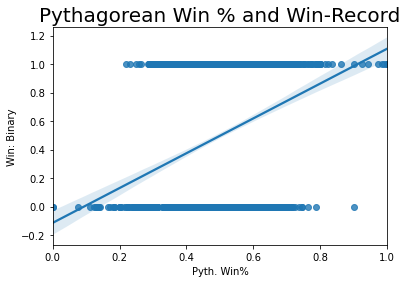

In [16]:
# Plot the model to articulate issues with LPM
## Create a scatter plot to explore the relationship between IV (i.e., pyth_wpct) and DV (Win)
import seaborn as sns
sns.regplot(x = 'pyth_wpct', y ='win', data = NHL_reg_2017_WL)
plt.xlabel('Pyth. Win%')
plt.ylabel('Win: Binary')
plt.title("Pythagorean Win % and Win-Record", fontsize=20)

## 3. Logistic Regression

### 3.1) Import libraries 

In [17]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 3.2) Fit a logistic regression of win on pyth_wpct & print outcomes

In [18]:
Win_Pyth = 'win~pyth_wpct'
model = smf.glm(formula = Win_Pyth, data = NHL_reg_2017_WL, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    win   No. Observations:                 2454
Model:                            GLM   Df Residuals:                     2452
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1610.0
Date:                Thu, 19 Dec 2024   Deviance:                       3220.1
Time:                        20:38:07   Pearson chi2:                 2.44e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7508      0.224    -12.296      0.0

In [21]:
print("Coefficients")
print(result.params)

print("\np-Values")
print(result.pvalues)

print("\nDependent variables")
print(result.model.endog_names)

Coefficients
Intercept   -2.750761
pyth_wpct    5.477324
dtype: float64

p-Values
Intercept    9.557038e-35
pyth_wpct    5.417440e-36
dtype: float64

Dependent variables
win


### 3.3) Obtain the fitted probabilities of winning on each game by using the model

In [22]:
# We can fit the model to calculate probabilities of winning on each game
## Here we can print first 10 probabilities corresponding to the probabilities of winning
fittedProbs = result.predict()
print(fittedProbs[0:10])

[0.90996275 0.08807429 0.06004369 0.938576   0.21401679 0.78188466
 0.31455179 0.6802077  0.73908778 0.25627307]


### 3.4) Create a binary winning variable by using the fitted probabilities

In [23]:
# Based on the fitted probabilites of winning, here we create a binary winning variable for 1 indicating Win (Prob. > 50%), 0 indicating lose (Prob. < 50%)
fittedWin = [1 if x > .5 else 0 for x in fittedProbs]
print(fittedWin[0:10])

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


### 3.5) Measuring model performance: Confusion matrix

#### A confusion matrix is a table that is often used to describe the performance of a logistic regression model on a set of data for which the true values are known. 

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(NHL_reg_2017_WL['win'], fittedWin)

array([[736, 491],
       [482, 745]])

In [25]:
# Success rate
(736+745)/2454

0.6035044824775876

In [26]:
print(classification_report(NHL_reg_2017_WL['win'], fittedWin, digits=3))

              precision    recall  f1-score   support

         0.0      0.604     0.600     0.602      1227
         1.0      0.603     0.607     0.605      1227

    accuracy                          0.604      2454
   macro avg      0.604     0.604     0.603      2454
weighted avg      0.604     0.604     0.603      2454



### 3.6) Plot the home team advantage

We can plot whether home teams win more games than away teams by plotting them in terms of the number of wins. 

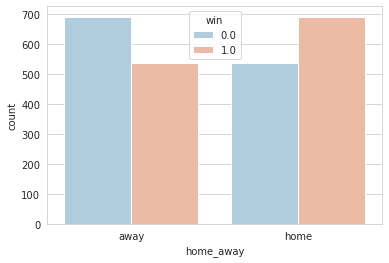

In [27]:
sns.set_style('whitegrid')
sns.countplot(x='home_away', hue='win', data=NHL_reg_2017_WL, capsize = .2, palette='RdBu_r')

##### The resulting graph is a mirror image of each group, home and away games, and it seems that teams win more when they play at home than when they play away games.

### Self Test: Multiple Logistic Regression
#### Fit the multiple logistic regression using pythagorean winning % and home dummy variable as independent variables
Instruction 
1. Use home dummy variable encoded with a value of 1 indicating home and 0 indicating away games
2. Interpret the coefficients


In [28]:
# Self-test
#Your code here
Win_Pyth_hm = 'win~pyth_wpct + home'
model2 = smf.glm(formula=Win_Pyth_hm, data = NHL_reg_2017_WL, family=sm.families.Binomial())
result2 = model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    win   No. Observations:                 2454
Model:                            GLM   Df Residuals:                     2451
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1591.7
Date:                Thu, 19 Dec 2024   Deviance:                       3183.3
Time:                        20:42:22   Pearson chi2:                 2.45e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0205      0.231    -13.062      0.0

In [29]:
#Your code here
print("Coefficients")
print(result2.params)

print("\np-Values")
print(result2.pvalues)

print("\nDependent variables")
print(result2.model.endog_names)

Coefficients
Intercept   -3.020509
pyth_wpct    5.506348
home         0.510112
dtype: float64

p-Values
Intercept    5.449766e-39
pyth_wpct    9.003285e-36
home         1.557719e-09
dtype: float64

Dependent variables
win


In [30]:
# We can fit the model to calculate probabilities of winning on each game
## Here we can print first 10 probabilities, which correspond to the probability of the chance of winning
#Your code here
fittedProbs2 = result2.predict()
print(fittedProbs2[0:10])

[0.88797932 0.10960097 0.04650788 0.95239086 0.25868122 0.73658147
 0.26149279 0.73373692 0.68816995 0.30658449]


In [31]:
# Based on the fitted probabilites of winning, here we create a binary winning variable for 1 indicating Win, 0 indicating lose
#Your code here
fittedWin2 = [1 if x > .5 else 0 for x in fittedProbs2]
print(fittedWin2[0:10])

[1, 0, 0, 1, 0, 1, 0, 1, 1, 0]


In [32]:
#Your code here
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(NHL_reg_2017_WL['win'], fittedWin2)

array([[751, 476],
       [458, 769]])

In [33]:
#Your code here
print(classification_report(NHL_reg_2017_WL['win'], fittedWin2, digits=3))

              precision    recall  f1-score   support

         0.0      0.621     0.612     0.617      1227
         1.0      0.618     0.627     0.622      1227

    accuracy                          0.619      2454
   macro avg      0.619     0.619     0.619      2454
weighted avg      0.619     0.619     0.619      2454



In [34]:
# Success rate
#Your code here
(751+769)/2454 # Model2 worked slightly better than Model1

0.6193969030154849

## 4. Basics of Forecasting Models and Some Issues

In [35]:
%%capture
################################# Forecasting Models #################################
# Create an 'year' variable to extract 2017 from the dataframe
# Use 2017 records to predict the rest of the regular season from NHL_reg_2017
NHL_reg_2017_WL['year'] = pd.DatetimeIndex(NHL_reg_2017_WL['date']).year

In [36]:
display(NHL_reg_2017_WL[0:10])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,home,cumGF,cumGA,pyth_wpct
9709,2,2017 NHL Regular Season,2017-10-04,2,2.0,7.0,-5.0,away,Toronto Maple Leafs,1,TOR,2,1.0,2.0,2017,0,7.0,2.0,0.924528
740,2,2017 NHL Regular Season,2017-10-04,2,7.0,2.0,-5.0,home,Winnipeg Jets,4,WPG,2,0.0,0.0,2017,1,2.0,7.0,0.075472
10454,2,2017 NHL Regular Season,2017-10-05,6,3.0,0.0,3.0,away,Calgary Flames,11,CGY,2,0.0,0.0,2017,0,0.0,3.0,0.000000
327,2,2017 NHL Regular Season,2017-10-05,6,0.0,3.0,3.0,home,Edmonton Oilers,10,EDM,2,1.0,2.0,2017,1,3.0,0.0,1.000000
1035,2,2017 NHL Regular Season,2017-10-05,8,5.0,3.0,-2.0,home,San Jose Sharks,16,SJS,2,0.0,0.0,2017,1,3.0,5.0,0.264706
9883,2,2017 NHL Regular Season,2017-10-05,8,3.0,5.0,-2.0,away,Philadelphia Flyers,14,PHI,2,1.0,2.0,2017,0,5.0,3.0,0.735294
9489,2,2017 NHL Regular Season,2017-10-05,10,4.0,3.0,1.0,away,Nashville Predators,19,NSH,2,0.0,0.0,2017,0,3.0,4.0,0.360000
1040,2,2017 NHL Regular Season,2017-10-05,10,3.0,4.0,1.0,home,Boston Bruins,20,BOS,2,1.0,2.0,2017,1,4.0,3.0,0.640000
9651,2,2017 NHL Regular Season,2017-10-05,12,2.0,3.0,-1.0,away,Montréal Canadiens,2,MTL,2,1.0,2.0,2017,0,3.0,2.0,0.692308
204,2,2017 NHL Regular Season,2017-10-05,12,3.0,2.0,-1.0,home,Buffalo Sabres,17,BUF,2,0.0,0.0,2017,1,2.0,3.0,0.307692


In [37]:
NHL_2017_train =  NHL_reg_2017_WL[NHL_reg_2017_WL.year == 2017]
display(NHL_2017_train[0:5])

NHL_2017_test =  NHL_reg_2017_WL[NHL_reg_2017_WL.year == 2018]
display(NHL_2017_test[0:5])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,home,cumGF,cumGA,pyth_wpct
9709,2,2017 NHL Regular Season,2017-10-04,2,2.0,7.0,-5.0,away,Toronto Maple Leafs,1,TOR,2,1.0,2.0,2017,0,7.0,2.0,0.924528
740,2,2017 NHL Regular Season,2017-10-04,2,7.0,2.0,-5.0,home,Winnipeg Jets,4,WPG,2,0.0,0.0,2017,1,2.0,7.0,0.075472
10454,2,2017 NHL Regular Season,2017-10-05,6,3.0,0.0,3.0,away,Calgary Flames,11,CGY,2,0.0,0.0,2017,0,0.0,3.0,0.000000
327,2,2017 NHL Regular Season,2017-10-05,6,0.0,3.0,3.0,home,Edmonton Oilers,10,EDM,2,1.0,2.0,2017,1,3.0,0.0,1.000000
1035,2,2017 NHL Regular Season,2017-10-05,8,5.0,3.0,-2.0,home,San Jose Sharks,16,SJS,2,0.0,0.0,2017,1,3.0,5.0,0.264706


,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year,home,cumGF,cumGA,pyth_wpct
564,2,2017 NHL Regular Season,2018-01-01,1192,1.0,4.0,3.0,home,Detroit Red Wings,18,DET,2,1.0,2.0,2018,1,105.0,120.0,0.433628
10333,2,2017 NHL Regular Season,2018-01-01,1192,4.0,1.0,3.0,away,Pittsburgh Penguins,8,PIT,2,0.0,0.0,2018,0,111.0,127.0,0.433076
535,2,2017 NHL Regular Season,2018-01-01,1194,0.0,6.0,6.0,home,Dallas Stars,46,DAL,2,1.0,2.0,2018,1,116.0,111.0,0.522016
10257,2,2017 NHL Regular Season,2018-01-01,1194,6.0,0.0,6.0,away,San Jose Sharks,16,SJS,2,0.0,0.0,2018,0,103.0,96.0,0.535132
806,2,2017 NHL Regular Season,2018-01-01,1196,1.0,6.0,5.0,home,Colorado Avalanche,22,COL,2,1.0,2.0,2018,1,122.0,115.0,0.529510


In [38]:
print(NHL_2017_train.shape)
print(NHL_2017_test.shape)

(1144, 19)
(1310, 19)


In [39]:
# Fit a logit model using the subset of the observations corresponding to games before 2017
# We then obtain predicted probabilities of the home team winning for this dataset
Win_GF_hm = 'win~pyth_wpct + home'
prd_model = smf.glm(formula = Win_GF_hm, data = NHL_2017_train, family=sm.families.Binomial())
result = prd_model.fit()

In [40]:
# Using the fitted model to predict the rest of the games in 2018
predictions = result.predict(NHL_2017_test)
print(predictions[0:10])

564      0.471573
10333    0.336250
535      0.595296
10257    0.474264
806      0.605461
9424     0.409704
10425    0.472354
1213     0.522548
351      0.494860
10003    0.547681
dtype: float64


In [41]:
predictions_nominal = [1 if x > .5 else 0 for x in predictions]
print(predictions_nominal[0:10])

[0, 0, 1, 0, 1, 0, 0, 1, 0, 1]


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(NHL_2017_test['win'], predictions_nominal)

array([[402, 253],
       [272, 383]])

In [43]:
print(classification_report(NHL_2017_test['win'], predictions_nominal, digits=3))

              precision    recall  f1-score   support

         0.0      0.596     0.614     0.605       655
         1.0      0.602     0.585     0.593       655

    accuracy                          0.599      1310
   macro avg      0.599     0.599     0.599      1310
weighted avg      0.599     0.599     0.599      1310



In [44]:
# Success rate
(402+383)/1310 

0.5992366412213741

## 5. Discussion: Statistical Forecasting and It's Real World Implication

The everyday meaning of predictions is to state the expected outcome of an event before it happens, it means the same as "forecast". whereas, in statistics, it is often used to mean simply the fitted value from a model. In our example, the model using Pyth.win% cannot give us a prediction in the everyday sense. (think about this per second)
It is because that we need to know the Goals For and Against, which happen at the same time as the game. In other words, In a real timeframe, it's not possible to use pyth.Win% to predict the game results. 

For our model to be predictive for future events, we need a plausible independent variable, which can be obtained beforehand. 
We will stretch our discussion on forecasting from this takeaway.

# The End